<a href="https://colab.research.google.com/github/yeseul106/Deep-Learning/blob/master/Kaggle_Flower_Classification_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Found 3015 images belonging to 5 classes.
Found 1308 images belonging to 5 classes.


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
100/100 [==============================] - 57s 570ms/step - loss: 1.6561 - accuracy: 0.3168 - val_loss: 1.3596 - val_accuracy: 0.4125
Epoch 2/100
100/100 [==============================] - 56s 560ms/step - loss: 1.2211 - accuracy: 0.4891 - val_loss: 1.2114 - val_accuracy: 0.5250
Epoch 3/100
100/100 [==============================] - 55s 549ms/step - loss: 1.1304 - accuracy: 0.5399 - val_loss: 1.2046 - val_accuracy: 0.4625
Epoch 4/100
100/100 [==============================] - 55s 547ms/step - loss: 1.0926 - accuracy: 0.5913 - val_loss: 1.0847 - val_accuracy: 0.5000
Epoch 5/100
100/100 [==============================] - 52s 516ms/step - loss: 1.0393 - accuracy: 0.5950 - val_loss: 1.2564 - val_accuracy: 0.5000
Epoch 6/100
100/100 [==============================] - 53s 529ms/step - loss: 0.9863 - accuracy: 0.6252 - val_loss: 1.2977 - val_accuracy: 0.5500
Epoch 7/100
100/100 [==============================] - 50s 497ms/step - loss: 0.9570 - accuracy: 0.6343 - val_loss: 1.3754 -

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Test accuracy: 73.00%


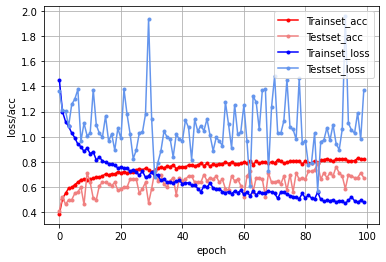

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Embedding, Dense, Flatten, GlobalMaxPooling2D, Conv2D, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers

np.random.seed(3)
tf.random.set_seed(3)

'''이미지 부풀리기'''
train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True, width_shift_range=0.1, height_shift_range=0.1,
                                   rotation_range=5, shear_range=0.7, vertical_flip=True, fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    '/content/gdrive/My Drive/Colab Notebooks/flowers_train',
    target_size=(100, 100),
    batch_size=20,
    class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    '/content/gdrive/My Drive/Colab Notebooks/flowers_test',
    target_size=(100, 100),
    batch_size=20,
    class_mode='categorical')

'''set CNN model'''
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(100, 100, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64,(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))  #출력층 노드 5개

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100, epochs=100, validation_data=test_generator, validation_steps=4)

'''model 평가하기'''
scores = model.evaluate_generator(
            test_generator, 
            steps = 5)

print("Test %s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

'''graph로 표현'''
y_vloss = history.history['val_loss']  #테스트셋 오차
y_loss = history.history['loss']  #학습셋 오차
y_vacc = history.history['val_accuracy']  #테스트셋 정확률
y_acc = history.history['accuracy']  #학습셋 정확률

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_acc, marker='.', c='red', label='Trainset_acc')
plt.plot(x_len, y_vacc, marker='.', c='lightcoral', label='Testset_acc')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')
plt.plot(x_len, y_vloss, marker='.', c='cornflowerblue', label='Testset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss/acc')
plt.show()

